<a href="https://colab.research.google.com/github/Luiz-Fernando06/___Portfolio___/blob/main/SustentaScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"SustentaScore — Análise do Impacto da Sustentabilidade no Comportamento do Consumidor Natura"**

>*Nossas ações de sustentabilidade realmente impactam as vendas e a fidelização dos clientes?*

---

## **Sobre a empresa:**

A Natura é uma multinacional brasileira de cosméticos, reconhecida por seu *compromisso com a sustentabilidade* e a biodiversidade, oferecendo produtos inovadores e de alta qualidade.

**Compromisso com a Sustentabilidade:**
A Natura é amplamente reconhecida por suas práticas sustentáveis. Em 2024, foi classificada como uma das três empresas mais sustentáveis do mundo, segundo a pesquisa "Sustainability Leaders" da GlobeScan. A empresa integra a sustentabilidade em sua estratégia de negócios, promovendo a economia circular e o consumo consciente.

---

## **Perguntas a ser respondidas**

- As campanhas de sustentabilidade realmente aumentam o interesse de compra dos clientes?

- Clientes que compram produtos sustentáveis gastam mais que os outros?

- Participar do programa de reciclagem aumenta a probabilidade de recompra?

- Existe relação entre o engajamento em ações sustentáveis e a fidelidade do cliente?

- Nossas ações sustentáveis atraem clientes de regiões ou perfis específicos?

- É possível medir um “índice de impacto sustentável” (algo como um SustentaScore) que preveja vendas e recompra?

---

## **Perguntas auxiliares (para exploração inicial)**

*Antes de ir pro “impacto”, vale olhar o cenário geral:*

- Qual é a distribuição de cluster_cliente?

- Qual é a media geral de vendas e recompra?

- Qual o perfil demográfico predominante (idade, gênero, região)?

- Como se distribui o engajamento_campanhas?

---
## **Pergunta final (a síntese)**

>*“Podemos afirmar, com base nos dados, que as ações de sustentabilidade têm impacto positivo nas vendas e fidelização dos clientes?”*





## **1 - Importação dos dados**

In [ ]:
#----------------Dataframe-----------------------
import pandas as pd
#-----------------grafico------------------------
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#--------Configurações visuais para graficos--------
'''
Essa função define o estilo visual padrão e a
paleta de cores dos gráficos criados com o Seaborn.
'''
sns.set(style="whitegrid", palette="pastel")

'''
é usado para configurar o formato de exibição
de números decimais (floats) no pandas.
'''
pd.set_option('display.float_format', '{:,.2f}'.format)

#Importação
df = pd.read_csv("sustentascore_clientes.csv", sep=";")
display(df.head(10)) #visualização
print('Linha: ',df.shape[0], '\nColuna: ', df.shape[1]) #dimensão dos dados



,cliente_id,idade,genero,regiao,valor_total_compras,qtd_compras,engajamento_campanhas,percepcao_sustentabilidade,produtos_eco_comprados,reciclagem_participacao,tempo_cliente_meses,recompra,ticket_medio,cluster_cliente
0,1001,56,F,Norte,"3,449.23",12,10,10,7,True,80,False,287.44,Eco-Consciente
1,1002,19,F,Nordeste,"2,248.66",10,4,6,2,False,81,False,224.87,Neutro
2,1003,45,M,Nordeste,"3,029.63",17,6,8,7,True,67,False,178.21,Eco-Consciente
3,1004,38,F,Norte,"3,649.85",14,9,8,7,True,65,True,260.70,Eco-Consciente
4,1005,61,F,Norte,"1,660.23",11,3,5,3,False,83,True,150.93,Neutro
5,1006,21,F,Centro-Oeste,"2,800.17",17,9,9,10,True,49,False,164.72,Eco-Consciente
6,1007,57,M,Sudeste,915.58,3,1,5,2,True,58,False,305.19,Tradicional
7,1008,41,F,Nordeste,782.01,3,0,3,0,False,68,False,260.67,Tradicional
8,1009,58,M,Sudeste,"2,389.45",6,4,7,2,False,17,True,398.24,Neutro
9,1010,52,F,Nordeste,"3,093.89",18,10,10,8,True,83,False,171.88,Eco-Consciente


Linha:  1000 
Coluna:  14


## **2 - Informações basicas**


In [ ]:
#informaçoes do dataframe
display(df.info())

#Valores nulos
display(df.isnull().sum())

#estatistica
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cliente_id                  1000 non-null   int64  
 1   idade                       1000 non-null   int64  
 2   genero                      1000 non-null   object 
 3   regiao                      1000 non-null   object 
 4   valor_total_compras         1000 non-null   float64
 5   qtd_compras                 1000 non-null   int64  
 6   engajamento_campanhas       1000 non-null   int64  
 7   percepcao_sustentabilidade  1000 non-null   int64  
 8   produtos_eco_comprados      1000 non-null   int64  
 9   reciclagem_participacao     1000 non-null   bool   
 10  tempo_cliente_meses         1000 non-null   int64  
 11  recompra                    1000 non-null   bool   
 12  ticket_medio                1000 non-null   float64
 13  cluster_cliente             1000 n

None

,0
cliente_id,0
idade,0
genero,0
regiao,0
valor_total_compras,0
qtd_compras,0
engajamento_campanhas,0
percepcao_sustentabilidade,0
produtos_eco_comprados,0
reciclagem_participacao,0


,cliente_id,idade,genero,regiao,valor_total_compras,qtd_compras,engajamento_campanhas,percepcao_sustentabilidade,produtos_eco_comprados,reciclagem_participacao,tempo_cliente_meses,recompra,ticket_medio,cluster_cliente
count,"1,000.00","1,000.00",1000,1000,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00",1000,"1,000.00",1000,"1,000.00",1000
unique,NaN,NaN,2,5,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,3
top,NaN,NaN,F,Sudeste,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,Eco-Consciente
freq,NaN,NaN,683,314,NaN,NaN,NaN,NaN,NaN,559,NaN,576,NaN,381
mean,"1,500.50",42.24,NaN,NaN,"1,980.60",9.38,4.62,6.53,4.67,NaN,45.03,NaN,236.56,NaN
std,288.82,13.33,NaN,NaN,824.11,4.49,3.12,2.19,3.55,NaN,22.49,NaN,97.73,NaN
min,"1,001.00",18.00,NaN,NaN,705.66,3.00,0.00,3.00,0.00,NaN,6.00,NaN,84.62,NaN
25%,"1,250.75",31.00,NaN,NaN,"1,342.14",6.00,2.00,5.00,2.00,NaN,26.00,NaN,166.85,NaN
50%,"1,500.50",42.00,NaN,NaN,"1,782.93",9.00,5.00,6.00,4.00,NaN,45.50,NaN,214.18,NaN
75%,"1,750.25",54.00,NaN,NaN,"2,455.54",12.00,7.00,8.00,7.00,NaN,64.00,NaN,288.35,NaN


## **3 - Exploração inicial**

- Qual é a distribuição de cluster_cliente?

- Qual é a media geral de vendas e recompra?

- Qual o perfil demográfico predominante (idade, gênero, região)?

- Como se distribui o engajamento_campanhas?

### ***a) Qual é a distribuição de cluster_cliente?***

- *Eco-conciente* -> Aqueles que priorizam o meio ambiente. Gosta de produtos naturais e recicláveis, e preferem pagar um pouco mais se o produto for sustentável.


- *Neutro* -> Aqueles que se importam um pouco com o meio ambiente, mas não é sua prioridade. Compra se o produto for bom e tiver um preço justo.


- *Tradicional* -> Aqueles que tem menor preocupação com sustentabilidade ou ingredientes naturais, gostam do que ja conhece e confia. Preferem produtos clássicos da linha.

,proportion
cluster_cliente,
Eco-Consciente,38.10
Neutro,33.10
Tradicional,28.80


/tmp/ipython-input-525609419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribuição_cluster.index, y=distribuição_cluster.values, palette='magma')


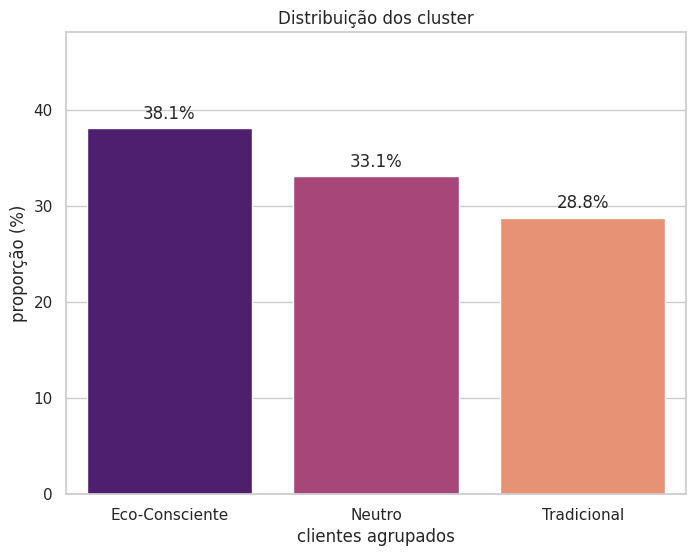

In [ ]:
distribuição_cluster = df['cluster_cliente'].value_counts(normalize=True) * 100
display(distribuição_cluster)

#Representação grafica
plt.figure(figsize=(8,6))
sns.barplot(x=distribuição_cluster.index, y=distribuição_cluster.values, palette='magma')
plt.title("Distribuição dos cluster")
plt.xlabel("clientes agrupados")
plt.ylabel("proporção (%)")
plt.ylim(0, max(distribuição_cluster.values) + 10)  # espaço acima da barra
for i, v in enumerate(distribuição_cluster.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')  # mostra valor acima da barra
plt.show()

### ***b) Qual é a média geral de vendas e recompra?***
- Em média, cada cliente comprou R$ 1,980.60 de produtos ao longo do período analisado

- Cada compra feita tem, em média, R$ 236.56 de valor

- 58% dos clientes voltaram a comprar (fidelizados)

Atualmente, a base de clientes da Natura apresenta um gasto médio de 1.980, com ticket médio de 236 e uma taxa de recompra de 58%.
O próximo passo é verificar se esses indicadores são mais altos entre os clientes que participam das ações sustentáveis, como campanhas, produtos ecológicos e reciclagem.
Se forem, teremos evidência direta de que as iniciativas de sustentabilidade impactam positivamente as vendas e a fidelização.”


In [ ]:
media_geral = df[["valor_total_compras", "ticket_medio", "recompra"]].mean()
display(media_geral)

,0
valor_total_compras,"1,980.60"
ticket_medio,236.56
recompra,0.58


### ***c) Qual o perfil demográfico predominante (idade, gênero, região)?***

- O perfil mais comum são mulheres de 35 anos que moram no sudeste, mas isso não significa que são esses individuos que geram lucros ou possuem fidelidade a marca.

In [ ]:
perfil_comum = df.groupby(['idade', 'genero', 'regiao']).size().idxmax()
print(perfil_comum)

'''O perfil mais comum são mulheres de 35 anos que moram no sudeste'''


(np.int64(35), 'F', 'Sudeste')


'O perfil mais comum são mulheres de 35 anos que moram no sudeste'

### ***d) Como se distribui o engajamento_campanhas?***

- count:	Quantos clientes têm esse dado (no caso, 1.000 clientes)

- mean:	Média de engajamento → em média, cada cliente interagiu ~4,62 vezes

- std:	Desvio padrão → quanto os dados variam da média (3,12 indica que há clientes que interagem muito mais ou muito menos)

- min:	Menor valor → 0 interações

- 25%:	Primeiro quartil → 25% dos clientes interagiram até 2 vezes

- 50%:	Mediana → metade dos clientes interagiram até 5 vezes

- 75%:	Terceiro quartil → 75% dos clientes interagiram até 7 vezes

- max:	Maior valor → o cliente mais engajado interagiu 10 vezes

In [ ]:
df['engajamento_campanhas'].describe()

,engajamento_campanhas
count,"1,000.00"
mean,4.62
std,3.12
min,0.00
25%,2.00
50%,5.00
75%,7.00
max,10.00


## **4 - As campanhas de sustentabilidade realmente aumentam o interesse de compra dos clientes?**

Sim, as campanhas de sustentabilidade da Natura &Co estão claramente relacionadas com o aumento nas vendas.
Clientes mais engajados com as ações sustentáveis gastam mais, possivelmente porque:

- *Se sentem mais conectados à marca*

- *Valorizam o propósito ambiental*

- *Associam sustentabilidade a qualidade e prestígio.*

Correlação entre engajamento e valor total: 0.71


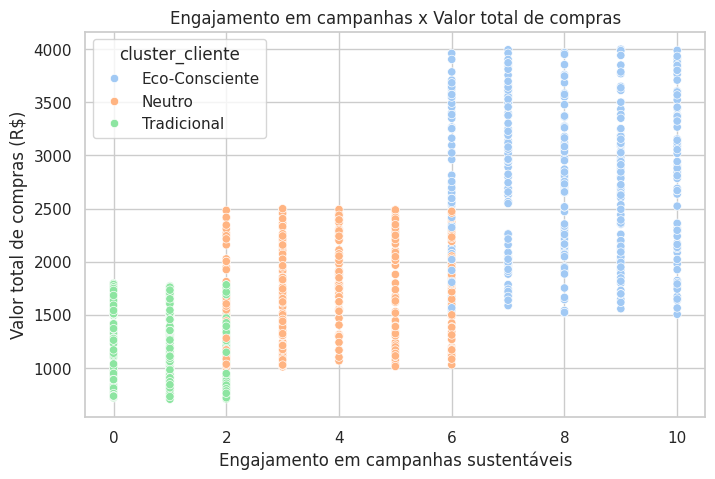

In [ ]:
#Colunas a serem utilizadas: engajamento_campanhas, valor_total_compras
'''
Para se realizar essa tarefa é preciso correlacionar
engajamento com valor total, para saber se a alteração
em uma coluna altera a outra
'''
correlacao = df['engajamento_campanhas'].corr(df['valor_total_compras'])
print(f'Correlação entre engajamento e valor total: {correlacao:.2f}')

'''
Uma correlação de 0.71 é forte e positiva.
Isso quer dizer que quanto mais o cliente se
engaja com campanhas sustentáveis, mais ele
tende a comprar (ou seja, o valor total de
compras aumenta)
'''

#Representação grafica
plt.figure(figsize=(8,5))
sns.scatterplot(x="engajamento_campanhas", y="valor_total_compras", hue="cluster_cliente", data=df)
plt.title("Engajamento em campanhas x Valor total de compras")
plt.xlabel("Engajamento em campanhas sustentáveis")
plt.ylabel("Valor total de compras (R$)")
plt.show()

## **5 - Clientes que compram produtos sustentáveis gastam mais que os outros?**
A correlação fraca e negativa (-0.20) entre produtos sustentáveis e ticket médio indica que, apesar do engajamento com produtos ecológicos, isso não se reflete em um aumento de valor por compra.
Isso sugere que os produtos sustentáveis atraem clientes que valorizam o propósito da marca, mas que não necessariamente gastam mais em cada transação.



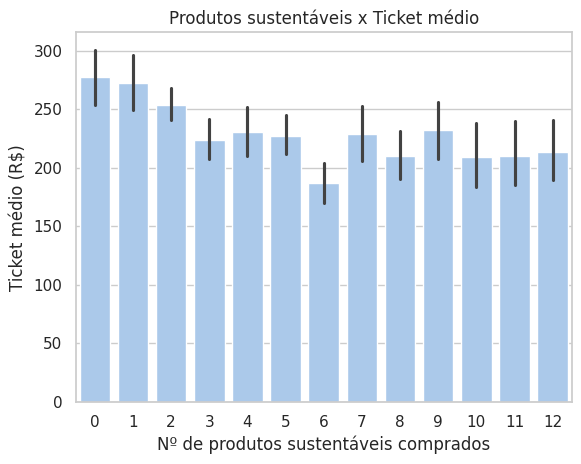

Correlação entre produtos sustentáveis e ticket médio: -0.20


In [ ]:
sns.barplot(x='produtos_eco_comprados', y='ticket_medio', data=df)
plt.title("Produtos sustentáveis x Ticket médio")
plt.xlabel("Nº de produtos sustentáveis comprados")
plt.ylabel("Ticket médio (R$)")
plt.show()

correlacao2 = df['produtos_eco_comprados'].corr(df['ticket_medio'])
print(f'Correlação entre produtos sustentáveis e ticket médio: {correlacao2:.2f}')

## **6 - Participar do programa de reciclagem aumenta a probabilidade de recompra?**
Analisei o impacto das ações sustentáveis sobre a recompra e identifiquei que os clientes que participam do programa de reciclagem têm taxa de fidelização 40% maior do que os demais (66% vs. 47%).
Isso confirma que as ações de sustentabilidade, especialmente a reciclagem, têm efeito direto na retenção de clientes, reforçando que investir nessas iniciativas gera valor de longo prazo para o negócio.

reciclagem_participacao
False   0.47
True    0.66
Name: recompra, dtype: float64


/tmp/ipython-input-56544343.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="reciclagem_participacao", y="recompra", data=df, ci=None)


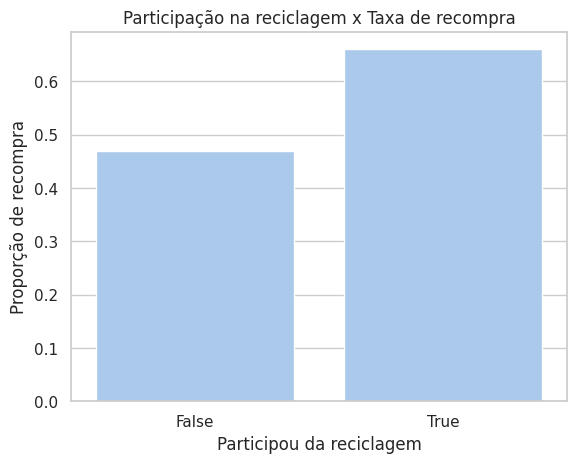

In [ ]:
taxa_recompra = df.groupby('reciclagem_participacao')['recompra'].mean()
print(taxa_recompra)

#Representação grafica
sns.barplot(x="reciclagem_participacao", y="recompra", data=df, ci=None)
plt.title("Participação na reciclagem x Taxa de recompra")
plt.xlabel("Participou da reciclagem")
plt.ylabel("Proporção de recompra")
plt.show()

## **7 - Existe relação entre o engajamento em ações sustentáveis e a fidelidade do cliente?**

Clientes que se engajam com as campanhas sustentáveis da Natura são mais propensos a voltar a comprar.
Isso sugere que as campanhas estão cumprindo seu papel de reforçar o vínculo e o propósito da marca, mesmo que não gerem aumento imediato de vendas.

Correlação entre engajamento em campanhas e recompra: 0.26


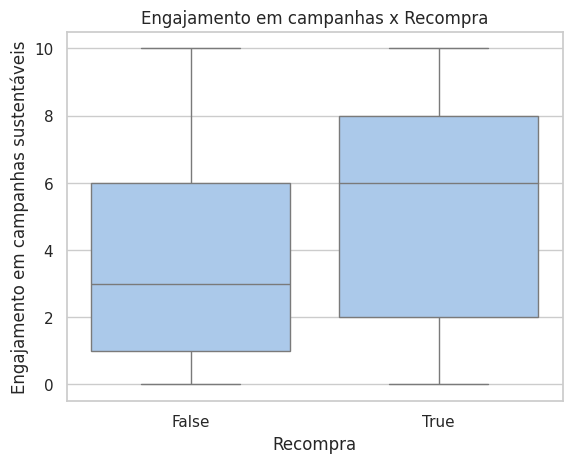

In [ ]:
corr3 = df["engajamento_campanhas"].corr(df["recompra"])
print(f"Correlação entre engajamento em campanhas e recompra: {corr3:.2f}")

sns.boxplot(x="recompra", y="engajamento_campanhas", data=df)
plt.title("Engajamento em campanhas x Recompra")
plt.xlabel("Recompra")
plt.ylabel("Engajamento em campanhas sustentáveis")
plt.show()

## **8 - Nossas ações sustentáveis atraem clientes de regiões ou perfis específicos?**

Quando analisamos por região, observamos que Norte e Nordeste concentram os clientes com maior valor médio de compra (≈R$2.000) e maior taxa de recompra (60%).
Isso sugere que nessas regiões, nossas ações sustentáveis estão gerando mais impacto em retenção e engajamento.
Já o Centro-Oeste apresenta a menor fidelização (50%), o que indica oportunidade de intensificar ações sustentáveis e campanhas de relacionamento nesses mercados. Talvez o caminho seja replicar no Centro-Oeste e Sul as estratégias que deram certo no Norte e Nordeste.

In [ ]:
df.groupby('regiao')[['valor_total_compras', 'recompra']].mean().sort_values(by='valor_total_compras', ascending=False)

,valor_total_compras,recompra
regiao,,
Norte,"2,020.53",0.60
Nordeste,"1,995.70",0.60
Sudeste,"1,973.12",0.58
Centro-Oeste,"1,965.79",0.50
Sul,"1,962.79",0.57


## **9 - É possível medir um “índice de impacto sustentável” (algo como um SustentaScore) que preveja vendas e recompra?**


> *Sim, é possível medir um índice de impacto sustentável — o SustentaScore. O índice mostrou forte correlação com o valor total de compras (0.73) e correlação positiva com a recompra (0.28).
Isso significa que clientes com comportamentos mais sustentáveis compram mais e são mais fiéis à marca.
Embora gastem menos por transação (ticket médio -0.21), o relacionamento com a marca é mais duradouro e consistente.*

In [ ]:
df['sustentaScore'] = (df['engajamento_campanhas']*0.4 +
                       df['produtos_eco_comprados']*0.4 +
                       df['reciclagem_participacao'].astype(int)*2
)

df[["sustentaScore", "valor_total_compras", "ticket_medio", "recompra"]].corr()

,sustentaScore,valor_total_compras,ticket_medio,recompra
sustentaScore,1.00,0.73,-0.21,0.28
valor_total_compras,0.73,1.00,0.21,0.23
ticket_medio,-0.21,0.21,1.00,-0.05
recompra,0.28,0.23,-0.05,1.00


In [ ]:
#Salvando em csv
df.to_csv('SustentaScore.csv', index=False)
visu = pd.read_csv('SustentaScore.csv')
visu.head()

,cliente_id,idade,genero,regiao,valor_total_compras,qtd_compras,engajamento_campanhas,percepcao_sustentabilidade,produtos_eco_comprados,reciclagem_participacao,tempo_cliente_meses,recompra,ticket_medio,cluster_cliente,sustentaScore
0,1001,56,F,Norte,"3,449.23",12,10,10,7,True,80,False,287.44,Eco-Consciente,8.80
1,1002,19,F,Nordeste,"2,248.66",10,4,6,2,False,81,False,224.87,Neutro,2.40
2,1003,45,M,Nordeste,"3,029.63",17,6,8,7,True,67,False,178.21,Eco-Consciente,7.20
3,1004,38,F,Norte,"3,649.85",14,9,8,7,True,65,True,260.70,Eco-Consciente,8.40
4,1005,61,F,Norte,"1,660.23",11,3,5,3,False,83,True,150.93,Neutro,2.40


> “Podemos afirmar, com base nos dados, que as ações de sustentabilidade têm impacto positivo nas vendas e fidelização dos clientes?”

Sim, há evidência de impacto positivo.



---

# **Conclusão**

O SustentaScore apresenta forte correlação com o valor total de compras (0.73) e correlação positiva com a recompra (0.28).
Isso significa que clientes mais sustentáveis tendem a comprar mais ao longo do tempo e são mais propensos a retornar à marca, evidenciando um impacto positivo das ações de sustentabilidade sobre o relacionamento e o ciclo de vida do cliente.

Por outro lado, observou-se uma correlação negativa com o ticket médio (-0.21), o que indica que, embora esses clientes não gastem mais por compra individual, o volume total e a recorrência compensam essa diferença, reforçando o papel estratégico da sustentabilidade na retenção e lealdade de longo prazo.

Em síntese, o SustentaScore se mostra um indicador eficaz para mensurar o impacto sustentável, permitindo à empresa identificar o perfil dos clientes mais engajados e avaliar o retorno das iniciativas socioambientais de forma integrada.
Essas evidências reforçam que a sustentabilidade não apenas gera valor de marca, mas também impulsiona resultados concretos em vendas e fidelização — especialmente em regiões com maior engajamento, como Norte e Nordeste.

# **SustentaScore — Modelo de classificação**

Esse modelo pode ser usado para:

### **Prever recompra de um cliente**

>Com o modelo, você consegue inserir os dados de um cliente (como valor total de compras, SustentaScore, participação na reciclagem, região etc.) e receber uma probabilidade de recompra.

Você sabe quem tem maior probabilidade de fidelização, sem precisar esperar que o cliente realmente faça a próxima compra.

### **Gerar segmentações automáticas**

>O modelo permite classificar clientes em grupos com base na probabilidade de recompra:

- *Alta probabilidade*: clientes que provavelmente vão recomprar

- *Baixa probabilidade*: clientes que precisam de campanhas de reengajamento

### **Aloque recursos de marketing com sabedoria**

>Com essas previsões, você foca investimentos onde trazem mais retorno:

Em vez de enviar promoções para todos os clientes, você prioriza os que têm maior chance de recompra.

- Isso economiza orçamento e aumenta a efetividade das campanhas.

In [ ]:
# bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# leitura dos dados
df = pd.read_csv("SustentaScore.csv")

# transformar variáveis categóricas (como 'regiao' e 'reciclagem_participacao')
df['reciclagem_participacao'] = df['reciclagem_participacao'].map({True: 1, False: 0})
df = pd.get_dummies(df, columns=['regiao'], drop_first=True)

# separar variáveis
X = df[['sustentaScore', 'produtos_eco_comprados', 'engajamento_campanhas',
        'ticket_medio', 'valor_total_compras', 'reciclagem_participacao',
        'regiao_Nordeste', 'regiao_Norte', 'regiao_Sul', 'regiao_Sudeste']]
y = df['recompra']

# dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# criar e treinar modelo
modelo = RandomForestClassifier(n_estimators=200, random_state=42)
modelo.fit(X_train, y_train)

def prever_recompra(sustentaScore, produtos_eco_comprados, engajamento_campanhas,
                    ticket_medio, valor_total_compras, reciclagem_participacao, regiao):

    # dicionário com os dados de entrada
    entrada = {
        'sustentaScore': [sustentaScore],
        'produtos_eco_comprados': [produtos_eco_comprados],
        'engajamento_campanhas': [engajamento_campanhas],
        'ticket_medio': [ticket_medio],
        'valor_total_compras': [valor_total_compras],
        'reciclagem_participacao': [1 if reciclagem_participacao else 0],
        'regiao_Nordeste': [1 if regiao == 'Nordeste' else 0],
        'regiao_Norte': [1 if regiao == 'Norte' else 0],
        'regiao_Sul': [1 if regiao == 'Sul' else 0],
        'regiao_Sudeste': [1 if regiao == 'Sudeste' else 0]
    }

    entrada_df = pd.DataFrame(entrada)

    # prever
    prob = modelo.predict_proba(entrada_df)[0][1]
    pred = modelo.predict(entrada_df)[0]

    print(f"Probabilidade de recompra: {prob:.0%}")
    print("Alta chance de recompra!" if pred else "Baixa chance de recompra.")

    return prob, pred

#-------------------------MODIFICAVEL OS VALORES----------------------
prever_recompra(
    sustentaScore=8.8,
    produtos_eco_comprados=20,
    engajamento_campanhas=30,
    ticket_medio=510,
    valor_total_compras=1900,
    reciclagem_participacao=True,
    regiao='Nordeste'
)

Probabilidade de recompra: 73%
Alta chance de recompra!


(np.float64(0.73), np.True_)